In [5]:
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy import linalg as LA

Наше уравнение:$$u_{t}=u_{x x}+\pi^{2} \sin (\pi x); u(0, t)=u(1, t)=0, u(x, 0)=0$$
Точным решением данного уравнения является:$$u(x, t)=\left(1-e^{-\pi^{2} t}\right) \sin (\pi x)$$
Мы же будем использовать следующую разностную схему:$$\frac{y_{m}^{n+1}-y_{m}^{n}}{\tau}=\frac{y_{m+1}^{n}-2 y_{m}^{n}+y_{m-1}^{n}}{h^{2}}+\pi^{2} \sin (\pi m h), y_{0}^{n}=y_{M}^{n}=0, y_{m}^{0}=0$$
Откуда сразу выразим$$y_{m}^{n+1}=y_{m}^{n}+\tau\left(\frac{y_{m+1}^{n}-2 y_{m}^{n}+y_{m-1}^{n}}{h^{2}}+\pi^{2} \sin (\pi m h)\right)$$
Данная схема устойчива когда:$$\tau / h^{2} \leq 1 / 2$$

In [13]:
dx = 0.01
dt = (dx)**2/4
T_max = 1/(math.pi**2)
N = int(T_max/dt)
M = int(1/dx)

In [7]:
y = np.zeros((N+1,M+1))
for i in range(N):
    for j in range (1,M):
        y[i+1][j] = y[i][j] + dt*((y[i][j+1] - 2*y[i][j] + y[i][j-1])/(dx)**2 + math.pi**2 * math.sin(math.pi*j*dx))

Построим график разности разностного решения и точного решения. Подставляя n от 0 до 4052, можно смотреть ошибку в разные моменты времени.

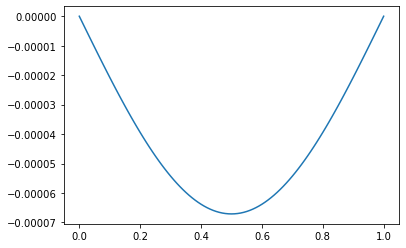

In [12]:
x = np.arange(0,1+dx,dx)
n = 4051
plt.plot(x,(1-math.e**(-math.pi**2 * n *dt)) * np.sin(math.pi*x)-y[n])